### 1) Understanding Data

* a) Understand Columns
* b) check dtype -> df[col].astype()
* c) Describe Numerical Cols
* d) Describe Categorical Cols|

### 2) EXTRACT FEATURES + EDA (uni - bi(heatmap) - multi) -> Insights:
* Uni-variate Analysis
    - Histogram (values)
    - distplot (distrbution)
    - catigorical (pie / count)

* Bi-Variate Analysis
    * Num vs Num
        - Scatter (relationship btn 2 variables)
        - line (trend with time)
    * Num vs Cat (distrbution)
        - box 
        - violin
        - strip
    * Cat vs Cat
        - bar (estimate plot)
        - countplot (count rows)

* Multi-Variate Analysis
    * Pairplot

### 3) Pre-Processing Mind Map:
* a) Detect & Handle Duplicates
* b) train_test_split
* c) Detect & Handle NaNs
* d) Detect & Handle Outliers
* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_scaled_resampled
* g) Imbalanced: X_train_resampled

In [1]:
# Manpulate
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
# import user_agents # get info from user_agent (browser_info)
# from ip2geotools.databases.noncommercial import DbIpCity as ip2geo # get location from ip
# from geopy.distance import great_circle # distance btn 2 (lat,long)
# from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding 
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling

# Modeling
## 1) Pipeline
from sklearn.pipeline import Pipeline, make_pipeline # to make pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector # apply pipeline to each column

## 2) Regression Models
from sklearn.linear_model import LinearRegression # if data is small and small_no_features
from sklearn.linear_model import SGDRegressor # if data is large: (can have penalty=constrains)
from sklearn.preprocessing import PolynomialFeatures # for polynomial regresion (then apply scaling after it)
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV # Regularization 

## 2') Classfication Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, MultinomialNB
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor # Ensemble (Voting)
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor # Bagging & Pasting
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor # Boosting
from sklearn.ensemble import StackingClassifier, StackingRegressor # Stacking

## 3) Model Selection (Underfitting vs Overfitting) [bias variance tradeoff => perfect model complexity]
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV # (Train - Valid - Test) + hyperparameters tunning 
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV # if data / features is large
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Evaluate Model: r2=> accuracy, L2-norm: if no outliers, L1-norm: if outliers
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from scipy import stats # Confidence Interval of Accuracy / Loss / Utility
import joblib # save model

# 4) Dimensionality reduction
from sklearn.decomposition import PCA, IncrementalPCA # till 20K features
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection # >20k features
from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap, TSNE # Manifold could be better than Projection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # for classfication problems (larg distance between diffrent classes)

# 5) Clustering
from sklearn.cluster import KMeans, MiniBatchKMeans # spherical dataset (n_cluster by (elbow / silhouette_score / silhoutette_samples)) 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import DBSCAN # eps by K-distanceGraph
from sklearn.neighbors import NearestNeighbors # determine nearest neighbor
# from sklearn.cluster import HDBSCAN # state of art
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples

# 6) Anomaly Detection
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.covariance import MinCovDet
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

# 7) Time Series Models
# Naive using df.diff(s)
from statsmodels.tsa.arima.model import ARIMA # Statstical Models as ARIMA and VAR
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR # Handle Seasonality and Trends
from xgboost import XGBRegressor, XGBClassifier # Machine Learning Model: extract lag features
from prophet import Prophet # fb prophet: trending model for forcasting
# from pandas.tseries.holiday import USFederalHolidayCalendar as Calender
# cal = Calender() # all holidays
# holidays = cal.holidays(start=df.index.min(), end=df.index.max(), return_name=True)
# holidays_df = pd.DataFrame(data=holidays, columns=['holiday']).reset_index().rename(columns={"index":'ds'})
# holidays_df
# holidays_df.groupby('holiday')[['ds']].count()

# 8) Recommendation System
# basic concept [collaborative, content, hybird]
## correlation + nearest_neighbor with cosine_similarity
from sklearn.neighbors import NearestNeighbors # content / collaborative
from sklearn.metrics.pairwise import sigmoid_kernel, rbf_kernel, cosine_similarity, cosine_distances # content / collaborative
from sklearn.decomposition import NMF, TruncatedSVD # Collaborative using ML

# Deep Learning: Strongest
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

### 1) Understanding Data

* a) Understand Columns
* b) check dtype -> df[col].astype()
* c) Describe Numerical Cols
* d) Describe Categorical Cols|

In [2]:
# https://www.kaggle.com/datasets/nicoletacilibiu/movies-and-ratings-for-recommendation-system
movies_df = pd.read_csv("movies.csv")
ratings_df = pd.read_csv("ratings.csv")
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [3]:
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
# Understand Columns
df = pd.merge(ratings_df, movies_df, on='movieId', how='inner')
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [5]:
# b) check dtype -> df[col].astype()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [6]:
# desribe num
# desribe cat
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [7]:
dff_movies_count = df.groupby(['title', "genres"]).agg({'userId':len, 'rating':np.mean}).rename(columns={'userId':'user_count', 'rating':'average_rating'}).reset_index()
dff_movies_count

,title,genres,user_count,average_rating
0,'71 (2014),Action|Drama|Thriller|War,1,4.000000
1,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,1,4.000000
2,'Round Midnight (1986),Drama|Musical,2,3.500000
3,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,1,5.000000
4,'Til There Was You (1997),Drama|Romance,2,4.000000
...,...,...,...,...
9719,eXistenZ (1999),Action|Sci-Fi|Thriller,22,3.863636
9720,xXx (2002),Action|Crime|Thriller,24,2.770833
9721,xXx: State of the Union (2005),Action|Crime|Thriller,5,2.000000
9722,¡Three Amigos! (1986),Comedy|Western,26,3.134615


### 2) EDA

In [8]:
# univariate-analysis
px.histogram(dff_movies_count, x='user_count')
# user_count > 50 'threshold'

In [9]:
px.histogram(dff_movies_count, x='average_rating')

In [10]:
# who is the most user watch films
px.histogram(df, x='userId', nbins=10000)

In [11]:
# what is most rating values
px.histogram(df, x='rating')

In [12]:
dff_user_count = df.groupby("userId")[['rating']].count().reset_index().rename(columns={'rating':"user_rating_count"}).sort_values(by='user_rating_count', ascending=True)
px.histogram(dff_user_count, x='user_rating_count') # people that make alot of rateing (> 100 rateing) should be included not 1-10 ratings (bias of users [include it in collaborative_filtering])

In [13]:
# which film has highest rating
dff_movies_count.sort_values(by='average_rating', ascending=False)

,title,genres,user_count,average_rating
3346,Garfield's Pet Force (2009),Animation,1,5.0
4158,Hype! (1996),Documentary,1,5.0
4875,Lady Jane (1986),Drama|Romance,1,5.0
1304,Boy Eats Girl (2005),Comedy|Horror,1,5.0
7437,Scooby-Doo! Abracadabra-Doo (2010),Animation|Children|Mystery,1,5.0
...,...,...,...,...
2483,Don't Look Now (1973),Drama|Horror|Thriller,1,0.5
4620,Journey 2: The Mysterious Island (2012),Action|Adventure|Comedy|Sci-Fi|IMAX,1,0.5
4584,Joe Dirt 2: Beautiful Loser (2015),Comedy,1,0.5
4559,Jesus Christ Vampire Hunter (2001),Action|Comedy|Horror|Musical,1,0.5


In [14]:
df_is_clean = df.groupby(['title', 'genres']).agg({'userId':len, 'rating':np.mean}).rename(columns={'userId':'movie_count', 'rating':'averge_rating'}).reset_index()

df_is_clean[df_is_clean['title'].duplicated() == True]

,title,genres,movie_count,averge_rating
1935,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller,15,3.6
2720,Emma (1996),Romance,1,3.5
2783,Eros (2004),Drama|Romance,1,4.0
7382,Saturn 3 (1980),Sci-Fi|Thriller,1,2.5
9274,War of the Worlds (2005),Action|Sci-Fi,2,3.0


In [15]:
df_is_clean[df_is_clean['title'] == 'Confessions of a Dangerous Mind (2002)']

,title,genres,movie_count,averge_rating
1934,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller,1,4.0
1935,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller,15,3.6


In [16]:
# we have multiple films the same film (consider it very below)
indices_to_stay = df_is_clean['title'].drop_duplicates().index
df_is_clean = df_is_clean.iloc[indices_to_stay].reset_index(drop=True)
df_is_clean

,title,genres,movie_count,averge_rating
0,'71 (2014),Action|Drama|Thriller|War,1,4.000000
1,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,1,4.000000
2,'Round Midnight (1986),Drama|Musical,2,3.500000
3,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,1,5.000000
4,'Til There Was You (1997),Drama|Romance,2,4.000000
...,...,...,...,...
9714,eXistenZ (1999),Action|Sci-Fi|Thriller,22,3.863636
9715,xXx (2002),Action|Crime|Thriller,24,2.770833
9716,xXx: State of the Union (2005),Action|Crime|Thriller,5,2.000000
9717,¡Three Amigos! (1986),Comedy|Western,26,3.134615


### 3) Pre-Processing Mind Map:
* a) Detect & Handle Duplicates
* b) Detect & Handle NaNs
* c) Detect & Handle Outliers
* d) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* e) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_scaled_resampled

In [17]:
# a) Detect & Handle Duplicates
dff_movies_count.duplicated().sum()

0

In [18]:
# b) Detect & Handle NaNs
# c) Detect & Handle Outliers
dff_movies_count.isna().sum()
# descripiton/genre -> ''
# user_count / average_rating -> 0

title             0
genres            0
user_count        0
average_rating    0
dtype: int64

In [19]:
# import nltk
# nltk.download('stopwords')

from nltk import corpus
english_stopwords = corpus.stopwords.words('english')
english_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
val = 'I"m, Ahmed, #'
tokkens = val.split(", ")
cleaned_tokkens = [tokken for tokken in tokkens if (tokken not in english_stopwords and tokken.isalnum())]
" ".join(cleaned_tokkens)

'Ahmed'

In [21]:
# clean genres: clean each column 
def clean_genres(val): # Action|Drama|Thriller|War
    val = val.lower().replace("|", ", ") # Action Drama Thriller War
    tokkens = val.split(", ")
    cleaned_tokkens = [tokken for tokken in tokkens if (tokken not in english_stopwords and tokken.isalnum())]
    return " ".join(cleaned_tokkens)
    
dff_movies_count['genres'] = dff_movies_count['genres'].apply(clean_genres)
dff_movies_count

,title,genres,user_count,average_rating
0,'71 (2014),action drama thriller war,1,4.000000
1,'Hellboy': The Seeds of Creation (2004),action adventure comedy documentary fantasy,1,4.000000
2,'Round Midnight (1986),drama musical,2,3.500000
3,'Salem's Lot (2004),drama horror mystery thriller,1,5.000000
4,'Til There Was You (1997),drama romance,2,4.000000
...,...,...,...,...
9719,eXistenZ (1999),action thriller,22,3.863636
9720,xXx (2002),action crime thriller,24,2.770833
9721,xXx: State of the Union (2005),action crime thriller,5,2.000000
9722,¡Three Amigos! (1986),comedy western,26,3.134615


In [22]:
# handle outliers
dff_2 = dff_movies_count.copy()
dff_2 = dff_2[dff_movies_count['user_count'] >= 20].reset_index(drop=True)
dff_2

,title,genres,user_count,average_rating
0,(500) Days of Summer (2009),comedy drama romance,42,3.666667
1,10 Things I Hate About You (1999),comedy romance,54,3.527778
2,101 Dalmatians (1996),adventure children comedy,47,3.074468
3,101 Dalmatians (One Hundred and One Dalmatians...,adventure animation children,44,3.431818
4,12 Angry Men (1957),drama,57,4.149123
...,...,...,...,...
1292,Zoolander (2001),comedy,54,3.509259
1293,Zootopia (2016),action adventure animation children comedy,32,3.890625
1294,eXistenZ (1999),action thriller,22,3.863636
1295,xXx (2002),action crime thriller,24,2.770833


In [23]:
# d) Encoding: genres
tf_idf = TfidfVectorizer(analyzer='word', lowercase=True, ngram_range=(1, 1), norm='l2', use_idf=True, stop_words='english')
tf_idf

TfidfVectorizer(stop_words='english')

In [24]:
tf_idf_matrix = tf_idf.fit_transform(dff_2['genres']) # scaled already
tf_idf_matrix

<1297x17 sparse matrix of type '<class 'numpy.float64'>'
	with 3383 stored elements in Compressed Sparse Row format>

### 4) Modeling:

* 1) Weighted-Average Filtering (Top 10 items)

* 2) Content-Based Filtering

* 3) Collaborative-Based Filtering (user-user and item-item)

* 4) Hybird-Based Filtering

* 5) ML models for collaborative (like SVD and NMF)

#### 1) Weighted-Average Filtering (Top 10 items)

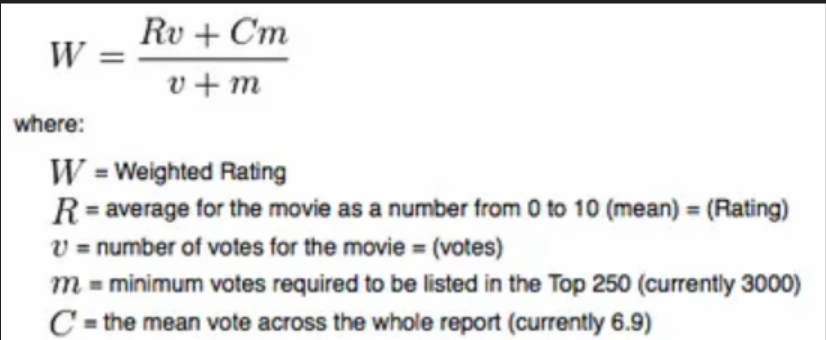

In [25]:
R = dff_2['average_rating']
v = dff_2['user_count']
m = dff_2['user_count'].quantile(0.7)
C = dff_2['average_rating'].mean()

dff_2['weighted_avg'] = (R * v + C * m) / (v + m)
dff_2.sort_values(by='weighted_avg', ascending=False)

,title,genres,user_count,average_rating,weighted_avg
1015,"Shawshank Redemption, The (1994)",crime drama,317,4.429022,4.294751
409,Fight Club (1999),action crime drama thriller,218,4.272936,4.121419
475,"Godfather, The (1972)",crime drama,192,4.289062,4.118006
1090,Star Wars: Episode IV - A New Hope (1977),action adventure,251,4.231076,4.103423
909,Pulp Fiction (1994),comedy crime drama thriller,307,4.197068,4.094330
...,...,...,...,...,...
66,Anaconda (1997),action adventure thriller,27,1.925926,2.995700
111,Batman & Robin (1997),action adventure fantasy thriller,42,2.214286,2.955128
479,Godzilla (1998),action thriller,33,1.954545,2.933493
260,Coneheads (1993),comedy,63,2.420635,2.933453


#### 2) Content-Based Filtering

In [26]:
# film_1 = (1, 2) and film_2 = (0.9, 2)
# so these 2 films should be very similar so their cosine_ceta should be close to 1
(1*0.9 + 2*2) / ((1**2 + 2**2) ** 0.5 * (0.9**2 + 2**2) ** 0.5)

0.9991680531005774

In [27]:
from sklearn.metrics.pairwise import rbf_kernel, sigmoid_kernel, cosine_similarity, cosine_distances 

content_similarity = cosine_similarity(tf_idf_matrix, tf_idf_matrix)
content_similarity

array([[1.        , 0.86652328, 0.21044511, ..., 0.        , 0.        ,
        0.18218955],
       [0.86652328, 1.        , 0.24286146, ..., 0.        , 0.        ,
        0.2102535 ],
       [0.21044511, 0.24286146, 1.        , ..., 0.        , 0.        ,
        0.15237115],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.73823567,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.73823567, 1.        ,
        0.        ],
       [0.18218955, 0.2102535 , 0.15237115, ..., 0.        , 0.        ,
        1.        ]])

In [28]:
title_to_index_df = pd.DataFrame(dff_2.index, index=dff_2['title'])
title_to_index_df

,0
title,
(500) Days of Summer (2009),0
10 Things I Hate About You (1999),1
101 Dalmatians (1996),2
101 Dalmatians (One Hundred and One Dalmatians) (1961),3
12 Angry Men (1957),4
...,...
Zoolander (2001),1292
Zootopia (2016),1293
eXistenZ (1999),1294


In [29]:
# Toy Story (1995)
movie_name = 'Toy Story (1995)'
movie_index = title_to_index_df.loc[movie_name]
movie_index

0    1186
Name: Toy Story (1995), dtype: int64

In [30]:
# Toy Story (1995)
movie_name = 'Toy Story (1995)'
movie_index = title_to_index_df.loc[movie_name]
scores = list(enumerate(content_similarity[movie_index][0])) 
scores

[(0, 0.1449486229696229),
 (1, 0.16727608679165845),
 (2, 0.6887716380442601),
 (3, 0.8336999600666546),
 (4, 0.0),
 (5, 0.4445221374249885),
 (6, 0.5195922732598319),
 (7, 0.0),
 (8, 0.2802953965101606),
 (9, 0.0),
 (10, 0.0),
 (11, 0.1361884782005968),
 (12, 0.0),
 (13, 0.16727608679165845),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.21109353663295832),
 (18, 0.0),
 (19, 0.16727608679165845),
 (20, 0.16727608679165845),
 (21, 0.0),
 (22, 0.0),
 (23, 0.2802953965101606),
 (24, 0.2048315171208917),
 (25, 0.1449486229696229),
 (26, 0.2166638357888837),
 (27, 0.2889577257148886),
 (28, 0.2889577257148886),
 (29, 0.1449486229696229),
 (30, 0.7529380544265374),
 (31, 0.7529380544265374),
 (32, 0.0),
 (33, 0.4609067499564451),
 (34, 0.4609067499564451),
 (35, 0.2048315171208917),
 (36, 0.0),
 (37, 0.24230421312303024),
 (38, 0.0),
 (39, 0.2889577257148886),
 (40, 0.2889577257148886),
 (41, 0.5907528810633806),
 (42, 0.7179904802044896),
 (43, 0.7996049101055187),
 (44, 0.40883057061317474)

In [31]:
sorted(scores, key=lambda x: x[1], reverse=True)

[(77, 1.0000000000000002),
 (369, 1.0000000000000002),
 (769, 1.0000000000000002),
 (1026, 1.0000000000000002),
 (1060, 1.0000000000000002),
 (1186, 1.0000000000000002),
 (1187, 1.0000000000000002),
 (593, 0.961063195918796),
 (1147, 0.9515787553171463),
 (1024, 0.9262204258146411),
 (653, 0.9070899380278812),
 (199, 0.8823560452932038),
 (414, 0.8823560452932038),
 (497, 0.8823560452932038),
 (575, 0.8823560452932038),
 (576, 0.8823560452932038),
 (711, 0.8823560452932038),
 (1234, 0.8823560452932038),
 (1188, 0.8499824552390676),
 (800, 0.844244270185943),
 (552, 0.8341787450593017),
 (667, 0.8341787450593017),
 (3, 0.8336999600666546),
 (678, 0.8336999600666546),
 (585, 0.828569731276894),
 (1293, 0.828569731276894),
 (1262, 0.822821641280671),
 (412, 0.8090315788218152),
 (1070, 0.8090315788218152),
 (216, 0.8059861821150348),
 (230, 0.8059861821150348),
 (1235, 0.8059861821150348),
 (563, 0.8036277760165309),
 (43, 0.7996049101055187),
 (613, 0.7996049101055187),
 (602, 0.78814541

In [32]:
# Toy Story (1995)
movie_name = 'Toy Story (1995)'
movie_index = title_to_index_df.loc[movie_name]
scores = list(enumerate(content_similarity[movie_index][0])) # index, val
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
simalrity_indices = [e[0] for e in sorted_scores]
simalrity_values = [e[1] for e in sorted_scores]

result = dff_2.copy()
result['simalrity'] = 0
result.iloc[simalrity_indices, 4] = simalrity_values
result.iloc[simalrity_indices].head(10)

,title,genres,user_count,average_rating,weighted_avg,simalrity
77,Antz (1998),adventure animation children comedy fantasy,45,3.244444,1.000000,0
369,"Emperor's New Groove, The (2000)",adventure animation children comedy fantasy,37,3.716216,1.000000,0
769,"Monsters, Inc. (2001)",adventure animation children comedy fantasy,132,3.871212,1.000000,0
1026,Shrek the Third (2007),adventure animation children comedy fantasy,21,3.023810,1.000000,0
1060,Space Jam (1996),adventure animation children comedy fantasy,53,2.707547,1.000000,0
1186,Toy Story (1995),adventure animation children comedy fantasy,215,3.920930,1.000000,0
1187,Toy Story 2 (1999),adventure animation children comedy fantasy,97,3.860825,1.000000,0
593,Inside Out (2015),adventure animation children comedy drama fantasy,43,3.813953,0.961063,0
1147,The Lego Movie (2014),action adventure animation children comedy fan...,31,3.870968,0.951579,0
1024,Shrek (2001),adventure animation children comedy fantasy ro...,170,3.867647,0.926220,0


In [33]:
def content_based_filtering_recommendation(movie_name, title_to_index_df, content_similarity, df, top_N=10):
    movie_index = title_to_index_df.loc[movie_name]
    scores = list(enumerate(content_similarity[movie_index][0])) # index, val
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    simalrity_indices = [e[0] for e in sorted_scores]
    simalrity_values = [e[1] for e in sorted_scores]

    result = df.copy()
    result['simalrity'] = 0
    result.iloc[simalrity_indices, 4] = simalrity_values
    return result.iloc[simalrity_indices].head(top_N)

In [34]:
movie_name = 'Toy Story (1995)'
content_based_filtering_recommendation(movie_name, title_to_index_df, content_similarity, dff_2, top_N=10)

,title,genres,user_count,average_rating,weighted_avg,simalrity
77,Antz (1998),adventure animation children comedy fantasy,45,3.244444,1.000000,0
369,"Emperor's New Groove, The (2000)",adventure animation children comedy fantasy,37,3.716216,1.000000,0
769,"Monsters, Inc. (2001)",adventure animation children comedy fantasy,132,3.871212,1.000000,0
1026,Shrek the Third (2007),adventure animation children comedy fantasy,21,3.023810,1.000000,0
1060,Space Jam (1996),adventure animation children comedy fantasy,53,2.707547,1.000000,0
1186,Toy Story (1995),adventure animation children comedy fantasy,215,3.920930,1.000000,0
1187,Toy Story 2 (1999),adventure animation children comedy fantasy,97,3.860825,1.000000,0
593,Inside Out (2015),adventure animation children comedy drama fantasy,43,3.813953,0.961063,0
1147,The Lego Movie (2014),action adventure animation children comedy fan...,31,3.870968,0.951579,0
1024,Shrek (2001),adventure animation children comedy fantasy ro...,170,3.867647,0.926220,0


In [35]:
def search_movie(val):
    if 'avengers' in val.lower():
        return True
    else:
        return False
    
dff_2[dff_2['title'].apply(search_movie)]

,title,genres,user_count,average_rating,weighted_avg
95,"Avengers, The (2012)",action adventure imax,69,3.869565,3.714898
96,Avengers: Age of Ultron (2015),action adventure,27,3.518519,3.520090


In [36]:
movie_name = 'Avengers, The (2012)'
content_based_filtering_recommendation(movie_name, title_to_index_df, content_similarity, dff_2, top_N=20)

,title,genres,user_count,average_rating,weighted_avg,simalrity
54,"Amazing Spider-Man, The (2012)",action adventure imax,30,3.250000,1.000000,0
94,Avatar (2009),action adventure imax,97,3.603093,1.000000,0
95,"Avengers, The (2012)",action adventure imax,69,3.869565,1.000000,0
212,Captain America: The Winter Soldier (2014),action adventure imax,31,3.741935,1.000000,0
834,Oblivion (2013),action adventure imax,20,3.300000,1.000000,0
1068,Spider-Man 2 (2004),action adventure imax,79,3.803797,1.000000,0
1076,Star Trek (2009),action adventure imax,59,3.864407,1.000000,0
1080,Star Trek Into Darkness (2013),action adventure imax,27,3.685185,1.000000,0
1088,Star Wars: Episode II - Attack of the Clones (...,action adventure imax,92,3.157609,1.000000,0
1117,Superman Returns (2006),action adventure imax,25,3.080000,1.000000,0


#### 3) Collaborative Filtering

In [37]:
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [38]:
dff_clean = df.drop('timestamp', axis=1)
dff_clean

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,Blair Witch (2016),Horror|Thriller


### Pre-process (by removing small users rating count & low rating movies)

In [39]:
# small users freq & small movies freq

small_users_freq_filter = dff_user_count[dff_user_count['userId'] > 100]['userId']

small_movies_freq_filter = dff_movies_count[dff_movies_count['user_count'] > 10]['title']
df_clean = df[(df['userId'].isin(small_users_freq_filter)) & df['title'].isin(small_movies_freq_filter)]

In [40]:
user_item_matrix = df_clean.pivot_table(index='userId', columns='title', values='rating')
user_item_matrix

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.5,4.0,4.0,...,NaN,NaN,NaN,4.0,4.0,NaN,4.5,NaN,3.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.5,3.5,NaN


In [41]:
user_sim = cosine_similarity(user_item_matrix.fillna(0))
user_sim_df = pd.DataFrame(user_sim, index=user_item_matrix.index, columns=user_item_matrix.index)

# Target user
target_user = 101

# Find similar users
similar_users = user_sim_df.loc[target_user].sort_values(ascending=False)
print(f"Similar users to {target_user}:\n{similar_users}\n")

Similar users to 101:
userId
101    1.000000
591    0.390116
535    0.362861
342    0.349041
392    0.302946
         ...   
456    0.000000
458    0.000000
173    0.000000
463    0.000000
121    0.000000
Name: 101, Length: 510, dtype: float64



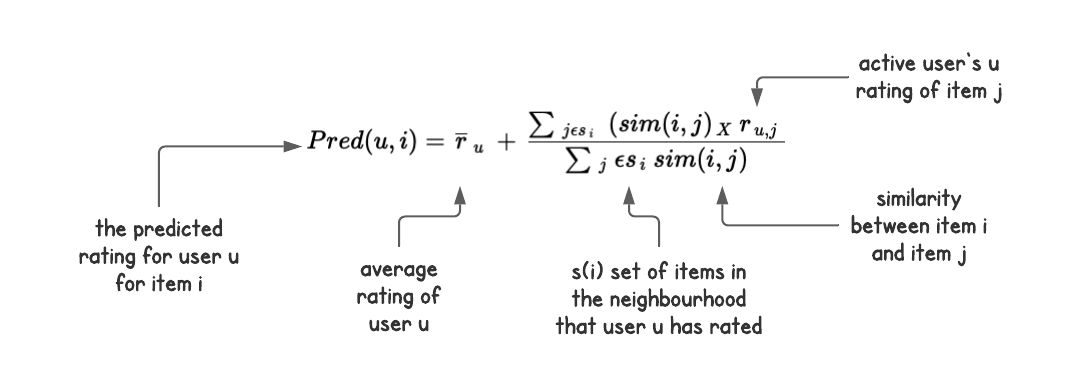

In [42]:
# user-user collaborative filtering
def collaborative_based_filtering(target_user, user_item_matrix, user_sim_df, top_k=2):
    # Top-K users execluding target_user it's self
    similar_users = user_sim_df.loc[target_user].drop(target_user).sort_values(ascending=False)[:top_k]
    
    # Get the movies rated by similar users
    movie_scores = {}
    for user, similarity in similar_users.items():
        user_ratings = user_item_matrix.loc[user]
        
        # Weighted Average rating by users to each movie 
        for movie, rating in user_ratings.items():
            if rating > 0 and pd.isna(user_item_matrix.loc[target_user, movie]):
                if movie not in movie_scores:
                    movie_scores[movie] = 0
                movie_scores[movie] += similarity * rating
    
    # Top Movies Names
    recommended_movies = sorted(movie_scores.items(), key=lambda x: x[1], reverse=True)
    return recommended_movies

# Get recommendations for the target user
recommendations = collaborative_based_filtering(target_user, user_item_matrix, user_sim_df)
print(f"Recommended movies for user-{target_user}:")
for movie, score in recommendations:
    print(f"{movie} (Score: {score:.2f})")

Recommended movies for user-101:
Matrix, The (1999) (Score: 3.40)
Maverick (1994) (Score: 1.95)
Star Wars: Episode I - The Phantom Menace (1999) (Score: 1.95)
Star Wars: Episode IV - A New Hope (1977) (Score: 1.95)
Toy Story 2 (1999) (Score: 1.95)
What Lies Beneath (2000) (Score: 1.95)
Never Been Kissed (1999) (Score: 1.92)
Runaway Bride (1999) (Score: 1.90)
Bug's Life, A (1998) (Score: 1.56)
Erin Brockovich (2000) (Score: 1.56)
Final Destination (2000) (Score: 1.56)
Forrest Gump (1994) (Score: 1.56)
Iron Giant, The (1999) (Score: 1.56)
Remember the Titans (2000) (Score: 1.56)
Thomas Crown Affair, The (1999) (Score: 1.56)
Almost Famous (2000) (Score: 1.17)
Dinosaur (2000) (Score: 1.17)
Frequency (2000) (Score: 1.17)
Nurse Betty (2000) (Score: 1.17)
Prince of Egypt, The (1998) (Score: 1.17)
She's All That (1999) (Score: 1.17)
Talented Mr. Ripley, The (1999) (Score: 1.17)
Analyze This (1999) (Score: 1.09)
Cookie's Fortune (1999) (Score: 1.09)
Notting Hill (1999) (Score: 1.09)
Night of th

In [43]:
df[df['userId'] == 101] # correct (similar to his movies)

,userId,movieId,rating,timestamp,title,genres
1278,101,223,4.0,968440895,Clerks (1994),Comedy
6591,101,1127,4.0,968440828,"Abyss, The (1989)",Action|Adventure|Sci-Fi|Thriller
7594,101,1210,4.0,968440698,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
12132,101,2395,5.0,968441198,Rushmore (1998),Comedy|Drama
12397,101,2492,1.0,968440828,20 Dates (1998),Comedy|Romance
...,...,...,...,...,...,...
85451,101,2318,5.0,968441029,Happiness (1998),Comedy|Drama
87634,101,2600,4.0,968443749,eXistenZ (1999),Action|Sci-Fi|Thriller
87847,101,233,4.0,968440983,Exotica (1994),Drama
87859,101,2337,3.0,968443714,Velvet Goldmine (1998),Drama


#### Now Let's Build Collaborative Filering types:

* 1) user-user collaborative filtering

* 2) item-item collaborative filtering

In [44]:
user_item_matrix

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.5,4.0,4.0,...,NaN,NaN,NaN,4.0,4.0,NaN,4.5,NaN,3.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.5,3.5,NaN


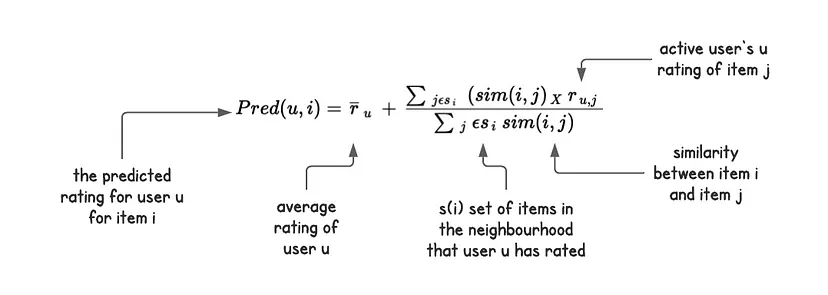

In [45]:
## 1) user-user collaborative filtering:
## we should handle (love raters and hate raters also so we will normalize also)

## Step-1) Normalize user_item_matrix across user
users_mean = user_item_matrix.mean(axis=1)
user_item_matrix_norm = user_item_matrix.sub(users_mean, axis=0).fillna(0) # fillnans = 0 after subtracting

## Step-2) users_similarities
user_similarity = cosine_similarity(user_item_matrix_norm) # shape = (n_users, n_users)

## Step-3) (Similarity * ratings) / (summation_similarity)
user_weighted_rating_predictions = user_similarity @ user_item_matrix.fillna(0) # n_users, n_items
similarity_sum = np.array([np.abs(user_similarity).sum(axis=1)]).T
user_weighted_rating_predictions = user_weighted_rating_predictions / similarity_sum
pd.DataFrame(user_weighted_rating_predictions.values, index=user_item_matrix.index, columns=user_item_matrix.columns)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
101,0.097178,0.241230,0.081534,0.462168,0.032175,0.116895,0.269360,0.264835,0.116327,0.137048,...,0.127465,0.101983,0.203685,0.267662,0.311749,0.383065,0.122256,0.598782,0.144842,0.203999
102,0.075817,0.170963,0.059784,0.238776,0.041167,0.129615,0.186101,0.249495,0.096887,0.099796,...,0.114703,0.070565,0.098090,0.229341,0.273134,0.264064,0.099758,0.155092,0.075995,0.096240
103,0.090412,0.239408,0.132939,0.276737,0.088478,0.306054,0.134570,0.427872,0.318294,0.188043,...,0.218088,0.119648,0.136502,0.423747,0.443035,0.596246,0.107151,0.237032,0.131198,0.152689
104,0.022430,0.118349,-0.039194,0.478852,0.029751,0.085463,0.212589,0.021949,-0.016311,-0.037441,...,-0.039253,0.041935,-0.011209,-0.038638,0.015495,0.057392,-0.028586,-0.001051,0.035405,0.018326
105,0.083929,0.498961,0.164417,0.403956,0.082637,0.189304,0.268603,0.724807,0.365636,0.408031,...,0.226826,0.164909,0.115423,0.616089,0.607380,0.494792,0.405383,0.266381,0.334569,0.157443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.151942,0.346663,0.117409,0.527508,0.089689,0.301792,0.396686,0.599661,0.157723,0.163654,...,0.210164,0.150295,0.178599,0.429877,0.451504,0.573613,0.178504,0.318471,0.178491,0.234726
607,0.042946,0.111857,0.045024,0.111431,0.037004,0.017288,0.130003,0.251536,0.058368,0.103648,...,0.074347,0.035347,0.052023,0.152529,0.164084,0.192828,0.040613,0.077747,0.098018,0.057133
608,0.173315,0.260644,0.075402,0.394043,0.120876,0.260621,0.347678,0.450099,0.120585,0.163601,...,0.142015,0.141449,0.141546,0.352505,0.392166,0.607286,0.165453,0.471266,0.340160,0.242363


In [46]:
def user_user_collaborative_filtering(user_item_matrix):
    ## Step-1) Normalize user_item_matrix across user
    users_mean = user_item_matrix.mean(axis=1)
    user_item_matrix_norm = user_item_matrix.sub(users_mean, axis=0).fillna(0) # fillnans = 0 after subtracting

    ## Step-2) users_similarities
    user_similarity = cosine_similarity(user_item_matrix_norm) # shape = (n_users, n_users)

    ## Step-3) (Similarity * ratings) / (summation_similarity)
    user_weighted_rating_predictions = user_similarity @ user_item_matrix.fillna(0) # n_users, n_items
    similarity_sum = np.array([np.abs(user_similarity).sum(axis=1)]).T
    user_weighted_rating_predictions = user_weighted_rating_predictions / similarity_sum
    return pd.DataFrame(user_weighted_rating_predictions.values, index=user_item_matrix.index, columns=user_item_matrix.columns)

user_user_collaborative_filtering(user_item_matrix)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
101,0.097178,0.241230,0.081534,0.462168,0.032175,0.116895,0.269360,0.264835,0.116327,0.137048,...,0.127465,0.101983,0.203685,0.267662,0.311749,0.383065,0.122256,0.598782,0.144842,0.203999
102,0.075817,0.170963,0.059784,0.238776,0.041167,0.129615,0.186101,0.249495,0.096887,0.099796,...,0.114703,0.070565,0.098090,0.229341,0.273134,0.264064,0.099758,0.155092,0.075995,0.096240
103,0.090412,0.239408,0.132939,0.276737,0.088478,0.306054,0.134570,0.427872,0.318294,0.188043,...,0.218088,0.119648,0.136502,0.423747,0.443035,0.596246,0.107151,0.237032,0.131198,0.152689
104,0.022430,0.118349,-0.039194,0.478852,0.029751,0.085463,0.212589,0.021949,-0.016311,-0.037441,...,-0.039253,0.041935,-0.011209,-0.038638,0.015495,0.057392,-0.028586,-0.001051,0.035405,0.018326
105,0.083929,0.498961,0.164417,0.403956,0.082637,0.189304,0.268603,0.724807,0.365636,0.408031,...,0.226826,0.164909,0.115423,0.616089,0.607380,0.494792,0.405383,0.266381,0.334569,0.157443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.151942,0.346663,0.117409,0.527508,0.089689,0.301792,0.396686,0.599661,0.157723,0.163654,...,0.210164,0.150295,0.178599,0.429877,0.451504,0.573613,0.178504,0.318471,0.178491,0.234726
607,0.042946,0.111857,0.045024,0.111431,0.037004,0.017288,0.130003,0.251536,0.058368,0.103648,...,0.074347,0.035347,0.052023,0.152529,0.164084,0.192828,0.040613,0.077747,0.098018,0.057133
608,0.173315,0.260644,0.075402,0.394043,0.120876,0.260621,0.347678,0.450099,0.120585,0.163601,...,0.142015,0.141449,0.141546,0.352505,0.392166,0.607286,0.165453,0.471266,0.340160,0.242363


In [47]:
def item_item_collaborative_filtering(user_item_matrix):

    ## Step-1) Normalize (if needed to include fairness so remove popularity bias)
    item_mean = user_item_matrix.mean(axis=0)
    user_item_matrix_norm = user_item_matrix.sub(item_mean, axis=1).fillna(0)

    ## Step-2) (Similarity * rating) / (summation_of_similarity)
    item_similarity = cosine_similarity(user_item_matrix.fillna(0).T) # shape: (n_items, n_items)
    # cosine_similarity(user_item_matrix_norm)

    ## Step-3) (Similarity * ratings) / (summation_similarity)
    item_weighted_rating_predictions = user_item_matrix.fillna(0).values @ item_similarity # (n_users, n_items) 
    similarity_sum = np.array([np.abs(item_similarity).sum(axis=1)]) # n_items, 1 
    item_weighted_rating_predictions = item_weighted_rating_predictions / similarity_sum
    return pd.DataFrame(item_weighted_rating_predictions, index=user_item_matrix.index, columns=user_item_matrix.columns)
item_item_collaborative_filtering(user_item_matrix)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
101,0.101384,0.085213,0.082753,0.124512,0.090456,0.090661,0.091223,0.102867,0.086943,0.094641,...,0.083880,0.083019,0.145094,0.089329,0.086382,0.105457,0.075286,0.168051,0.093415,0.105079
102,0.084749,0.069439,0.055739,0.083455,0.066649,0.095279,0.091827,0.088052,0.069602,0.065550,...,0.065328,0.072355,0.084956,0.070780,0.074855,0.084393,0.061215,0.078423,0.072434,0.087370
103,0.673274,0.772714,0.806257,0.740353,0.738295,0.856082,0.768887,0.859487,1.131138,0.814433,...,0.722299,0.720496,0.622874,0.778718,0.789842,0.857350,0.792111,0.673851,0.684670,0.697054
104,0.346717,0.462335,0.339952,0.537852,0.426664,0.456469,0.460979,0.418086,0.439145,0.346791,...,0.383088,0.389347,0.315165,0.371785,0.411521,0.427423,0.424613,0.349329,0.372374,0.357235
105,0.676383,1.315288,1.371539,0.956021,1.203489,0.906900,0.887962,1.298860,1.634683,1.519585,...,1.125668,1.072418,0.713293,1.236651,1.248603,1.117022,1.412563,0.866177,1.181369,0.778562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,1.073300,1.077248,0.866493,1.204730,1.025500,1.083076,1.126294,1.297251,1.178915,1.039605,...,0.899175,0.935197,1.219220,1.094304,0.972653,1.096030,0.943487,1.271395,1.001367,1.161545
607,0.385429,0.261178,0.222932,0.320469,0.259596,0.341128,0.368546,0.365642,0.258330,0.279877,...,0.250232,0.275223,0.383220,0.288446,0.289824,0.323937,0.240372,0.369686,0.300024,0.372588
608,1.269562,1.173457,1.099730,1.293688,1.195038,1.258351,1.287882,1.257442,1.100193,1.130185,...,1.179900,1.164141,1.156387,1.205500,1.224669,1.435263,1.133254,1.502435,1.494580,1.255166


In [48]:
predictions = item_item_collaborative_filtering(user_item_matrix)
predictions

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
101,0.101384,0.085213,0.082753,0.124512,0.090456,0.090661,0.091223,0.102867,0.086943,0.094641,...,0.083880,0.083019,0.145094,0.089329,0.086382,0.105457,0.075286,0.168051,0.093415,0.105079
102,0.084749,0.069439,0.055739,0.083455,0.066649,0.095279,0.091827,0.088052,0.069602,0.065550,...,0.065328,0.072355,0.084956,0.070780,0.074855,0.084393,0.061215,0.078423,0.072434,0.087370
103,0.673274,0.772714,0.806257,0.740353,0.738295,0.856082,0.768887,0.859487,1.131138,0.814433,...,0.722299,0.720496,0.622874,0.778718,0.789842,0.857350,0.792111,0.673851,0.684670,0.697054
104,0.346717,0.462335,0.339952,0.537852,0.426664,0.456469,0.460979,0.418086,0.439145,0.346791,...,0.383088,0.389347,0.315165,0.371785,0.411521,0.427423,0.424613,0.349329,0.372374,0.357235
105,0.676383,1.315288,1.371539,0.956021,1.203489,0.906900,0.887962,1.298860,1.634683,1.519585,...,1.125668,1.072418,0.713293,1.236651,1.248603,1.117022,1.412563,0.866177,1.181369,0.778562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,1.073300,1.077248,0.866493,1.204730,1.025500,1.083076,1.126294,1.297251,1.178915,1.039605,...,0.899175,0.935197,1.219220,1.094304,0.972653,1.096030,0.943487,1.271395,1.001367,1.161545
607,0.385429,0.261178,0.222932,0.320469,0.259596,0.341128,0.368546,0.365642,0.258330,0.279877,...,0.250232,0.275223,0.383220,0.288446,0.289824,0.323937,0.240372,0.369686,0.300024,0.372588
608,1.269562,1.173457,1.099730,1.293688,1.195038,1.258351,1.287882,1.257442,1.100193,1.130185,...,1.179900,1.164141,1.156387,1.205500,1.224669,1.435263,1.133254,1.502435,1.494580,1.255166


In [49]:
def recommend_top_n(predictions, user_item_matrix, user_id, top_n=10):

    # step-1) recommend movie to user_id
    user_predictions = predictions.loc[user_id]

    # step-2) filter out already rated
    rated_items = user_item_matrix.loc[user_id].dropna()

    # step-2) get most rated items from other users
    return user_predictions.drop(rated_items.index).sort_values(ascending=False).head(top_n) # top 10

In [50]:
predictions = user_user_collaborative_filtering(user_item_matrix)
user_id = 101
recommend_top_n(predictions, user_item_matrix, user_id, top_n=20)

title
Matrix, The (1999)                                                                1.813079
Shawshank Redemption, The (1994)                                                  1.713349
Pulp Fiction (1994)                                                               1.669113
Forrest Gump (1994)                                                               1.559999
Silence of the Lambs, The (1991)                                                  1.386993
Star Wars: Episode IV - A New Hope (1977)                                         1.376499
Usual Suspects, The (1995)                                                        1.311393
Star Wars: Episode V - The Empire Strikes Back (1980)                             1.305306
Lord of the Rings: The Fellowship of the Ring, The (2001)                         1.259202
Seven (a.k.a. Se7en) (1995)                                                       1.251838
Memento (2000)                                                                    1.

In [51]:
predictions = item_item_collaborative_filtering(user_item_matrix)
user_id = 101
recommend_top_n(predictions, user_item_matrix, user_id, top_n=20)

title
Jean de Florette (1986)                             0.194793
Buffalo '66 (a.k.a. Buffalo 66) (1998)              0.179154
Lone Star (1996)                                    0.172761
Secrets & Lies (1996)                               0.167660
Unbearable Lightness of Being, The (1988)           0.167551
Astronaut's Wife, The (1999)                        0.162850
400 Blows, The (Les quatre cents coups) (1959)      0.162521
General's Daughter, The (1999)                      0.161181
Room with a View, A (1986)                          0.160711
Cook the Thief His Wife & Her Lover, The (1989)     0.158515
Eat Drink Man Woman (Yin shi nan nu) (1994)         0.157905
Bachelor, The (1999)                                0.157112
All About My Mother (Todo sobre mi madre) (1999)    0.156986
Three Colors: Red (Trois couleurs: Rouge) (1994)    0.156005
Stigmata (1999)                                     0.155433
Red Violin, The (Violon rouge, Le) (1998)           0.155375
Out of Sight (1998

In [52]:
user_item_matrix.loc[101][user_item_matrix.loc[101].isna() == False].sort_values(ascending=False)

title
Fight Club (1999)                                    5.0
Man on the Moon (1999)                               5.0
Sweet Hereafter, The (1997)                          5.0
Eyes Wide Shut (1999)                                5.0
Being John Malkovich (1999)                          5.0
Election (1999)                                      5.0
Doors, The (1991)                                    5.0
Rushmore (1998)                                      5.0
Happiness (1998)                                     5.0
Ghostbusters (a.k.a. Ghost Busters) (1984)           4.0
American Beauty (1999)                               4.0
Go (1999)                                            4.0
Gone in 60 Seconds (2000)                            4.0
Magnolia (1999)                                      4.0
Abyss, The (1989)                                    4.0
Pacific Heights (1990)                               4.0
Galaxy Quest (1999)                                  4.0
Shakespeare in Love (1998

#### 4) Hybird Filtering of best Recommendation Systems

**will use Content and user_user Collaborative Togther**

In [53]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stopwords

<WordListCorpusReader in 'C:\\Users\\ahmed\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

In [54]:
dff_clean = df_clean.groupby(['title', 'genres']).agg({'userId':len, 'rating':np.mean}).rename(columns={'userId':'movie_count', 'rating':'averge_rating'}).reset_index()
dff_clean

,title,genres,movie_count,averge_rating
0,"'burbs, The (1989)",Comedy,13,3.230769
1,(500) Days of Summer (2009),Comedy|Drama|Romance,32,3.718750
2,10 Cloverfield Lane (2016),Thriller,12,3.500000
3,10 Things I Hate About You (1999),Comedy|Romance,50,3.460000
4,"10,000 BC (2008)",Adventure|Romance|Thriller,14,2.785714
...,...,...,...,...
2118,Zoolander (2001),Comedy,47,3.489362
2119,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,25,3.920000
2120,eXistenZ (1999),Action|Sci-Fi|Thriller,21,3.928571
2121,xXx (2002),Action|Crime|Thriller,19,2.921053


In [55]:
def preprocessing(df):
    dff_clean = df.groupby(['title', 'genres']).agg({'userId':len, 'rating':np.mean}).rename(columns={'userId':'movie_count', 'rating':'averge_rating'}).reset_index()
    
    def clean_text(val): # NLP
        val = val.lower() # handle lowercase
        tokkens = val.split("|")
        clean_text = [tokken for tokken in tokkens if (tokken not in stop_words) and (tokken.isalnum())] # handle stop_words and punctuation
        return " ".join(clean_text)
    
    dff_clean['clean_genres'] = dff_clean['genres'].apply(clean_text)
    return dff_clean

dff_clean = preprocessing(df_clean)
dff_clean

,title,genres,movie_count,averge_rating,clean_genres
0,"'burbs, The (1989)",Comedy,13,3.230769,comedy
1,(500) Days of Summer (2009),Comedy|Drama|Romance,32,3.718750,comedy drama romance
2,10 Cloverfield Lane (2016),Thriller,12,3.500000,thriller
3,10 Things I Hate About You (1999),Comedy|Romance,50,3.460000,comedy romance
4,"10,000 BC (2008)",Adventure|Romance|Thriller,14,2.785714,adventure romance thriller
...,...,...,...,...,...
2118,Zoolander (2001),Comedy,47,3.489362,comedy
2119,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,25,3.920000,action adventure animation children comedy
2120,eXistenZ (1999),Action|Sci-Fi|Thriller,21,3.928571,action thriller
2121,xXx (2002),Action|Crime|Thriller,19,2.921053,action crime thriller


In [56]:
# 2 duplicates with diffrent genres so remove them
dff_clean['title'].duplicated().sum()

2

In [57]:
indices_to_stay = dff_clean['title'].drop_duplicates().index
dff_clean = dff_clean.iloc[indices_to_stay].reset_index(drop=True)
dff_clean

,title,genres,movie_count,averge_rating,clean_genres
0,"'burbs, The (1989)",Comedy,13,3.230769,comedy
1,(500) Days of Summer (2009),Comedy|Drama|Romance,32,3.718750,comedy drama romance
2,10 Cloverfield Lane (2016),Thriller,12,3.500000,thriller
3,10 Things I Hate About You (1999),Comedy|Romance,50,3.460000,comedy romance
4,"10,000 BC (2008)",Adventure|Romance|Thriller,14,2.785714,adventure romance thriller
...,...,...,...,...,...
2116,Zoolander (2001),Comedy,47,3.489362,comedy
2117,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,25,3.920000,action adventure animation children comedy
2118,eXistenZ (1999),Action|Sci-Fi|Thriller,21,3.928571,action thriller
2119,xXx (2002),Action|Crime|Thriller,19,2.921053,action crime thriller


In [58]:
tf_idf = TfidfVectorizer(analyzer='word', lowercase=True, ngram_range=(1, 1), norm='l2', use_idf=True, stop_words='english')
tf_idf_matrix = tf_idf.fit_transform(dff_clean['clean_genres'])
tf_idf_matrix

<2121x17 sparse matrix of type '<class 'numpy.float64'>'
	with 5377 stored elements in Compressed Sparse Row format>

In [59]:
def content_based_filtering(item_features, user_item_matrix):

    # step-1) cosine_similarity
    content_similarity = cosine_similarity(item_features) # n_items, n_items

    # # step-2) calculate weighted_rating
    content_weighted_rating_predictions = user_item_matrix.fillna(0) @ content_similarity
    similarity_sum = np.array([np.abs(content_similarity).sum(axis=1)])
    content_weighted_rating_predictions = content_weighted_rating_predictions / similarity_sum
    return pd.DataFrame(content_weighted_rating_predictions.values, index=user_item_matrix.index, columns=user_item_matrix.columns)
content_based_filtering(tf_idf_matrix, user_item_matrix)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
101,0.106620,0.095127,0.092932,0.078721,0.072040,0.084608,0.068579,0.124472,0.124472,0.102656,...,0.095127,0.104740,0.104337,0.107987,0.095651,0.106620,0.085972,0.092213,0.094769,0.090269
102,0.081559,0.081735,0.147893,0.095419,0.117211,0.082446,0.073942,0.057255,0.057255,0.094016,...,0.081735,0.105530,0.103353,0.110406,0.089622,0.081559,0.088503,0.136175,0.139210,0.129448
103,0.551390,0.580335,0.390164,0.504569,0.501734,0.784642,1.047047,0.715864,0.715864,0.606540,...,0.580335,0.530667,0.495452,0.645779,0.463528,0.551390,0.745195,0.413105,0.540080,0.597013
104,0.494599,0.425754,0.131934,0.555377,0.411366,0.567792,0.717848,0.193886,0.193886,0.254256,...,0.425754,0.181746,0.304968,0.163942,0.306762,0.494599,0.527305,0.174040,0.168899,0.449259
105,0.556658,0.800109,0.863814,0.652879,0.835801,0.663591,0.828419,1.063470,1.063470,0.944085,...,0.800109,0.927962,0.811562,1.043259,0.683411,0.556658,0.741619,0.841942,0.955252,0.574466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.884093,1.377127,0.795723,1.257006,1.160616,0.844307,0.851460,1.591999,1.591999,1.150691,...,1.377127,1.055912,0.920298,1.190121,0.745056,0.884093,0.809813,0.715608,0.814062,0.890441
607,0.178811,0.238417,0.396321,0.204267,0.322626,0.247207,0.266727,0.299504,0.299504,0.339198,...,0.238417,0.371988,0.292750,0.341608,0.397169,0.178811,0.280875,0.418001,0.395119,0.182277
608,1.003492,0.867190,1.434580,0.867731,1.112216,1.067154,1.108359,0.866223,0.866223,1.144402,...,0.867190,1.197905,1.224491,1.214609,1.291059,1.003492,1.141625,1.408454,1.430036,0.950778


In [60]:
def hybird_based_filtering(user_item_matrix, item_features, alpha=0.5):
    # alpha: weight for item_item_colaborative filtering

    item_item_predictions = user_user_collaborative_filtering(user_item_matrix)
    content_predictions = content_based_filtering(item_features, user_item_matrix)
    # their results are below they dont need scaling before addition
    hybird_predictions = alpha * item_item_predictions + (1-alpha) * content_predictions
    return hybird_predictions

In [61]:
hybird_predictions = hybird_based_filtering(user_item_matrix, tf_idf_matrix, alpha=0.7)
recommend_top_n(hybird_predictions, user_item_matrix, 101, 10)

title
Matrix, The (1999)                                           1.296819
Shawshank Redemption, The (1994)                             1.233877
Pulp Fiction (1994)                                          1.200654
Forrest Gump (1994)                                          1.117466
Silence of the Lambs, The (1991)                             0.998537
Star Wars: Episode IV - A New Hope (1977)                    0.989703
Usual Suspects, The (1995)                                   0.948540
Star Wars: Episode V - The Empire Strikes Back (1980)        0.939869
Seven (a.k.a. Se7en) (1995)                                  0.907013
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.901964
Name: 101, dtype: float64

In [62]:
predictions = item_item_collaborative_filtering(user_item_matrix)
predictions.describe()

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.239176,0.251528,0.252976,0.257986,0.246794,0.254776,0.255487,0.288317,0.268496,0.258590,...,0.239418,0.237896,0.237216,0.252867,0.259497,0.268043,0.253476,0.251785,0.242134,0.249983
std,0.330855,0.347451,0.373338,0.340176,0.345764,0.332410,0.341121,0.366557,0.358204,0.355231,...,0.345056,0.334959,0.326087,0.348516,0.356550,0.361201,0.356999,0.340826,0.340799,0.338043
min,0.009948,0.009285,0.003048,0.013103,0.007157,0.009541,0.011480,0.010527,0.008839,0.005642,...,0.007841,0.008121,0.008804,0.008499,0.007909,0.007860,0.005765,0.011282,0.007674,0.010860
25%,0.057676,0.055324,0.050952,0.061918,0.054125,0.067163,0.063256,0.072767,0.061497,0.060201,...,0.049908,0.053476,0.056539,0.058756,0.059552,0.063076,0.052999,0.058833,0.054171,0.060518
50%,0.109678,0.114963,0.108717,0.121907,0.111639,0.122545,0.118569,0.136802,0.126130,0.123009,...,0.106217,0.109342,0.113521,0.113486,0.119907,0.124410,0.118314,0.118881,0.109354,0.121078
75%,0.276575,0.288740,0.289665,0.295144,0.278373,0.297752,0.294859,0.358759,0.315478,0.298960,...,0.266252,0.273480,0.265086,0.298621,0.297185,0.319101,0.287643,0.285679,0.285390,0.293763
max,3.084524,2.977748,2.783707,2.962328,2.987675,2.695972,2.942964,2.912340,2.884075,2.833589,...,2.951933,3.005212,3.138660,2.959445,2.931668,2.994372,2.969886,3.065934,2.972231,3.084813


In [63]:
predictions = content_based_filtering(tf_idf_matrix, user_item_matrix)
predictions.describe()

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.196234,0.205443,0.226847,0.202172,0.233450,0.222082,0.242724,0.211294,0.211294,0.231687,...,0.205443,0.226261,0.214614,0.232475,0.211316,0.196234,0.228664,0.235762,0.246252,0.199832
std,0.289263,0.282161,0.305981,0.283408,0.298498,0.304373,0.339320,0.292790,0.292790,0.301441,...,0.282161,0.299961,0.290748,0.306710,0.298157,0.289263,0.312553,0.322866,0.328570,0.290805
min,0.000000,0.010190,0.000000,0.000000,0.008330,0.009885,0.000000,0.001989,0.001989,0.010805,...,0.010190,0.008658,0.006262,0.007847,0.006205,0.000000,0.007644,0.000000,0.000000,0.000000
25%,0.039546,0.046956,0.055781,0.041217,0.063489,0.049220,0.052969,0.045615,0.045615,0.061856,...,0.046956,0.059135,0.052827,0.057807,0.048686,0.039546,0.053644,0.059098,0.065037,0.042637
50%,0.081763,0.105361,0.117345,0.096626,0.119174,0.104774,0.113966,0.109680,0.109680,0.122187,...,0.105361,0.119903,0.103375,0.121004,0.096341,0.081763,0.108893,0.112274,0.125852,0.091531
75%,0.211966,0.234535,0.252379,0.225269,0.272990,0.257703,0.277433,0.236496,0.236496,0.272385,...,0.234535,0.264325,0.240464,0.268769,0.241872,0.211966,0.267326,0.274674,0.290355,0.219971
max,2.555527,2.710507,2.588045,2.618982,2.668019,2.530874,2.541312,2.874225,2.874225,2.740002,...,2.710507,2.727260,2.577809,2.824467,2.464899,2.555527,2.579019,2.633967,2.750871,2.631185


#### 5) Machine Learning Models (matrix factorization for collaborative filtering):

* 1) SVD (small dataset)

* 2) NMF (if no values are negative in user_prefrences (rating))

* 3) ALS (larg datasets)

In [64]:
# 1) SVD (small dataset)
from sklearn.decomposition import TruncatedSVD

def collaborative_based_filtering_svd(user_item_matrix, n_components=10, max_iter=2000):
    # Step-1: Make SVD Model
    svd_model = TruncatedSVD(n_components=n_components, n_iter=max_iter, random_state=42)

    # Step-2: Decompose the matrix
    user_features = svd_model.fit_transform(user_item_matrix.fillna(0))  # U matrix
    item_features = svd_model.components_  # V matrix

    # Step-3: Reconstruct and evaluate
    reconstructed_matrix = user_features @ item_features
    mse = mean_squared_error(user_item_matrix.fillna(0).values, reconstructed_matrix)
    print(f"Reconstruction Error (MSE): {mse}")
    
    # Return the reconstructed matrix as a DataFrame
    return pd.DataFrame(reconstructed_matrix, index=user_item_matrix.index, columns=user_item_matrix.columns)

In [65]:
# Make Recommendations
user_id = 101
svd_predictions = collaborative_based_filtering_svd(user_item_matrix)
recommend_top_n(svd_predictions, user_item_matrix, user_id, top_n=10)

Reconstruction Error (MSE): 0.47984667678452403


title
Matrix, The (1999)                     1.277172
Breakfast Club, The (1985)             0.942931
Trainspotting (1996)                   0.922595
There's Something About Mary (1998)    0.920672
As Good as It Gets (1997)              0.913902
Big Lebowski, The (1998)               0.906690
Total Recall (1990)                    0.820474
Clockwork Orange, A (1971)             0.804784
Good Will Hunting (1997)               0.794939
Memento (2000)                         0.787386
Name: 101, dtype: float64

In [66]:
# 2) NMF (if no values are negative in user_prefrences (rating))
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error

def collaborative_based_filtering_nmf(user_item_matrix, n_components=10, max_iter=2000):
    # Step-1: Make NMF Model
    nmf_model = NMF(n_components=n_components, init='random', max_iter=max_iter, random_state=42)

    # Step-2: Decompose the matrix
    user_features = nmf_model.fit_transform(user_item_matrix.fillna(0))  # U matrix
    item_features = nmf_model.components_.T  # V matrix

    # Step-3: Reconstruct and evaluate
    reconstructed_matrix = user_features @ item_features.T
    mse = mean_squared_error(user_item_matrix.fillna(0).values, reconstructed_matrix)
    print(f"Reconstruction Error (MSE): {mse}")
    return pd.DataFrame(reconstructed_matrix, index=user_item_matrix.index, columns=user_item_matrix.columns)

In [67]:
# Make Recommendations
user_id = 101
nmf_predicitons = collaborative_based_filtering_nmf(user_item_matrix)
recommend_top_n(nmf_predicitons, user_item_matrix, user_id, top_n=10)

Reconstruction Error (MSE): 0.4995416097980213


title
Matrix, The (1999)                                         0.809286
Aliens (1986)                                              0.680228
Blade Runner (1982)                                        0.663245
Star Wars: Episode V - The Empire Strikes Back (1980)      0.656066
Alien (1979)                                               0.646993
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                  0.641966
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)    0.632450
Terminator, The (1984)                                     0.625857
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)       0.622896
Memento (2000)                                             0.615008
Name: 101, dtype: float64

#### Compare Results
| **Model**                          | **Top 5 Recommendations**                                                                                           | **Similarity with User Preferences**                                                                                         | **Relevance to User's Actual Likes**                                              |
|------------------------------------|----------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------|
| **Content-Based Filtering**        | *Jean de Florette (1986)*, *Secrets & Lies (1996)*, *Unbearable Lightness of Being (1988)*, *Lone Star (1996)*, *All About My Mother (1999)* | Strong in recommending based on **similar item characteristics** like genre, director, or actors.                             | **Low** relevance to user’s actual likes. Recommendations are more focused on **artsy/foreign** films, while user prefers **mainstream indie and drama films**. |
| **Item-Item Collaborative**       | *Matrix, The (1999)*, *Breakfast Club, The (1985)*, *Trainspotting (1996)*, *There's Something About Mary (1998)*, *As Good as It Gets (1997)* | Works well in **similar user-item relationships**, but recommendations lean towards **action** and **comedy** genres.       | **Moderate** relevance. It suggests a mix of **action** and **comedy** films, which may align with some of the user's tastes but misses the **drama** focus.         |
| **User-User Collaborative**       | *Matrix, The (1999)*, *Shawshank Redemption (1994)*, *Pulp Fiction (1994)*, *Forrest Gump (1994)*, *Silence of the Lambs (1991)* | More aligned with **user preferences** via **similar taste profiles** (focusing on **classic dramas** and **thrillers**).   | **High** relevance. The recommendations like *Pulp Fiction*, *Shawshank Redemption*, *Silence of the Lambs* align more closely with the user's drama preferences. |
| **Hybrid (Content + User-User)**  | *Matrix, The (1999)*, *Shawshank Redemption (1994)*, *Pulp Fiction (1994)*, *Forrest Gump (1994)*, *Silence of the Lambs (1991)* | Balances **content-based** and **collaborative filtering**, improving **relevance** by leveraging both similarities and user history. | **High** relevance. Combining content and user-based filtering provides a more balanced approach, blending **action** and **drama**. |
| **NMF (Matrix Factorization)**    | *Matrix, The (1999)*, *Aliens (1986)*, *Blade Runner (1982)*, *Star Wars: Episode V* (1980), *Memento (2000)*  | Best for finding **latent factors** but the recommendations are heavily skewed toward **sci-fi** and **action** genres.      | **Moderate** relevance. While NMF suggests **action** and **sci-fi** films, it does include a few **thrillers** like *Memento*, which aligns somewhat with the user's tastes. |
| **SVD (Matrix Factorization)**    | *Matrix, The (1999)*, *Breakfast Club, The (1985)*, *Trainspotting (1996)*, *There's Something About Mary (1998)*, *Big Lebowski (1998)* | Similar to NMF, focused more on **action** and **comedy** films with less diversity in genre.                               | **Moderate** relevance. Like NMF, it has a strong **action** and **comedy** focus but less overlap with the user's **drama** preferences. |


# Final Notes:

* 1) Top 10 Recommendation: Use for main page in web (by weighted_average_with_popularity)

* 2) If user clicked on movie show similar top 10 movies: (by Content Based Filtering)

* 3) If user clicked many times on items and rated them (external or internaly by length of watched movies) more than 10 ratings then use Hybird Colaborative Filtering (by: user_user(at this dataset) + Content with large weight for user_user)